<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/New%20DataExploration_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/6th Sem/Machine Learning/buddymove_holidayiq.csv")

## Head of the Dataset

In [ ]:
dataset.head(10)

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68.0,95
1,User 2,2,62,76,76,69.0,68
2,User 3,2,50,97,87,50.0,75
3,User 4,2,68,77,95,76.0,61
4,User 5,2,98,54,59,95.0,86
5,User 6,3,52,109,93,52.0,76
6,User 7,3,64,85,82,73.0,69
7,User 8,3,54,107,92,54.0,76
8,User 9,3,64,108,64,NaN,93
9,User 10,3,86,76,74,74.0,103


## Shape of dataset

In [ ]:
dataset.shape

(249, 7)

## Info of dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User Id    249 non-null    object 
 1   Sports     249 non-null    int64  
 2   Religious  249 non-null    int64  
 3   Nature     249 non-null    int64  
 4   Theatre    249 non-null    int64  
 5   Shopping   243 non-null    float64
 6   Picnic     249 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.7+ KB


## Summary of dataset

In [ ]:
dataset.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,243.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,113.625514,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.493050,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.500000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,109.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


## Handling missing values

In [ ]:
dataset.isna().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     6
Picnic       0
dtype: int64

There are 6 missing values in Shopping Column.

You can either drop missing values or enter the mean or median values.  

In [ ]:
data=dataset.fillna(dataset["Shopping"].mean())
data.head(10)

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68.000000,95
1,User 2,2,62,76,76,69.000000,68
2,User 3,2,50,97,87,50.000000,75
3,User 4,2,68,77,95,76.000000,61
4,User 5,2,98,54,59,95.000000,86
5,User 6,3,52,109,93,52.000000,76
6,User 7,3,64,85,82,73.000000,69
7,User 8,3,54,107,92,54.000000,76
8,User 9,3,64,108,64,113.625514,93
9,User 10,3,86,76,74,74.000000,103


In [ ]:
data.isna().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

There are no missing values in the dataset.

## Handling Duplicated Data

In [ ]:
dataset.drop_duplicates(subset ="Religious",keep = False, inplace = True)

In [ ]:
dataset.shape

(35, 7)

##Handling Outliers

In [ ]:
from numpy.lib.shape_base import dsplit
outliers = []
def detect_outliers_zscore(ds):
    thres = 3
    mean = nm.mean(ds)
    std = nm.std(ds)
    # print(mean, std)
    for i in ds:
        z_score = (i-mean)/std
        if (nm.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(dataset)
print("Outliers from Z-scores method: ", sample_outliers)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


UFuncTypeError: ignored

In [ ]:
outliers = []
data=dataset["Picnic"]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = nm.percentile(data, 25)
    q3 = nm.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(dataset)
print("Outliers from IQR method: ", sample_outliers)


UFuncTypeError: ignored

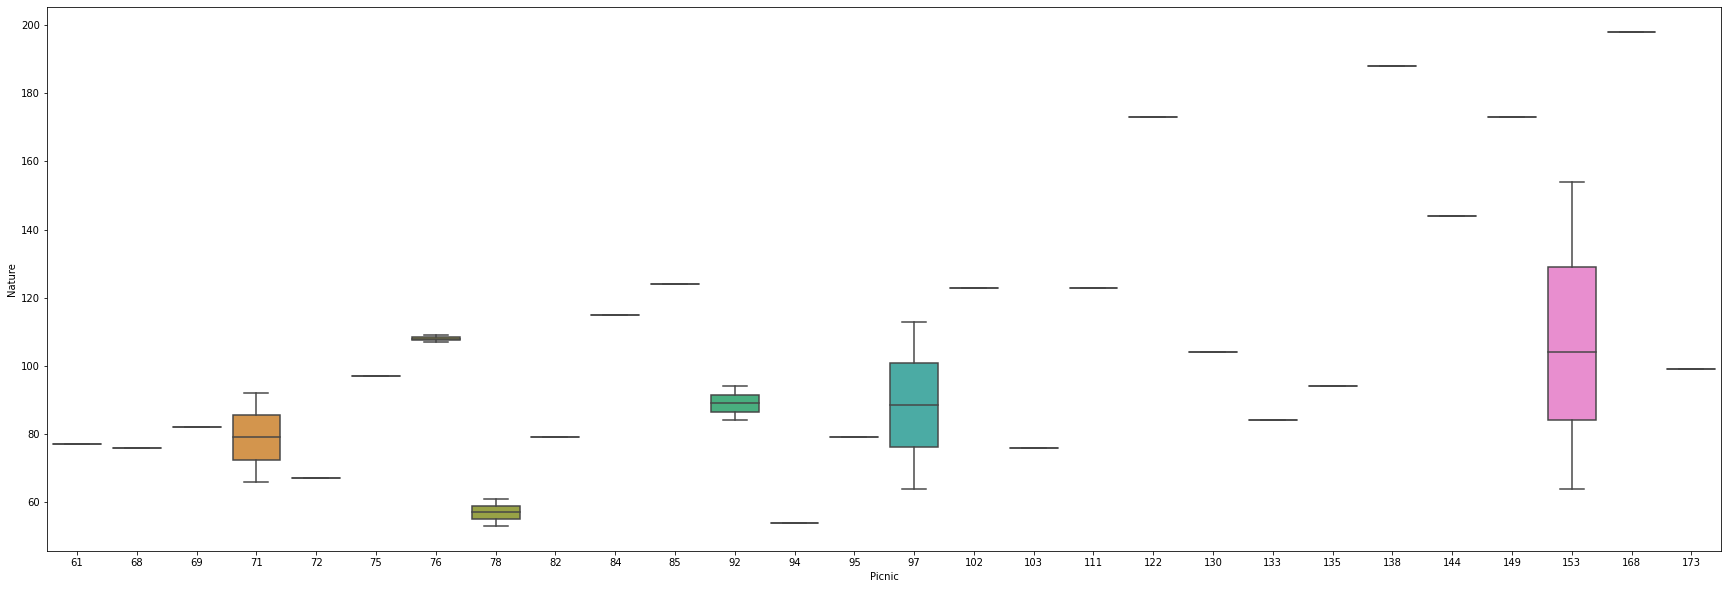

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10))
sns.boxplot(x="Picnic", y="Nature", data=dataset)

##Variable Identification

In [ ]:
dataset.dtypes

User Id       object
Sports         int64
Religious      int64
Nature         int64
Theatre        int64
Shopping     float64
Picnic         int64
dtype: object

## Univariate analysis

Using Scatter Plot

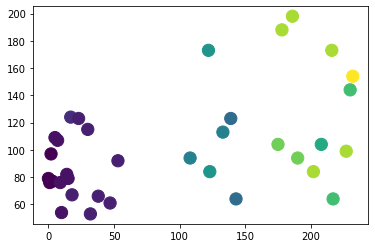

In [ ]:
plt.scatter(dataset.index,dataset["Nature"],s=150,c=y)
plt.show()

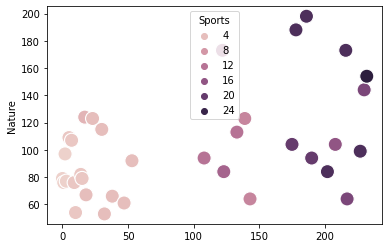

In [ ]:
sns.scatterplot( x =dataset.index , y = dataset["Nature"], hue=dataset["Sports"],s=200)
plt.show()

Boxplot

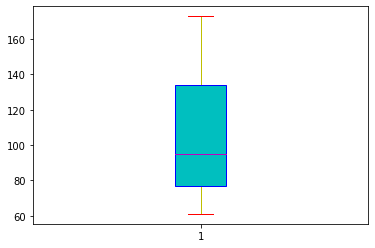

In [ ]:
plt.boxplot(dataset["Picnic"],patch_artist=True,
            boxprops=dict(facecolor='c',color='b'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='y'),
            medianprops=dict(color='m'))
plt.show()

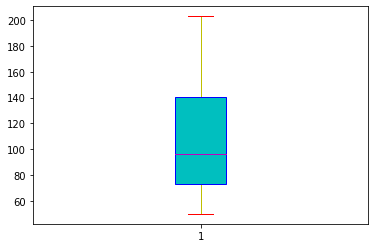

In [ ]:
plt.boxplot(dataset["Religious"],patch_artist=True,
            boxprops=dict(facecolor='c',color='b'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='y'),
            medianprops=dict(color='m'))
plt.show()

Plotting all variables in one

In [ ]:
dfs=dataset.drop("User Id",axis=1)

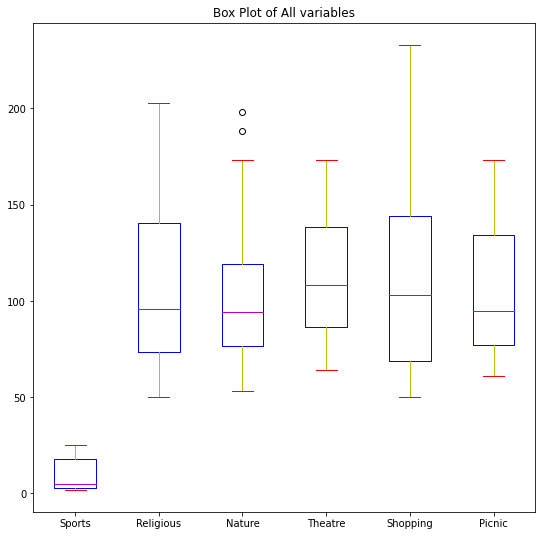

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Box Plot of All variables")
plt.boxplot(dfs.values, labels=["Sports","Religious","Nature","Theatre","Shopping","Picnic"],
            boxprops=dict(color='b'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='y'),
            medianprops=dict(color='m'))
plt.show()

## Bi Variable Analysis

Plottig the relation between Sports and Shopping for the data where Value of Sports < 80

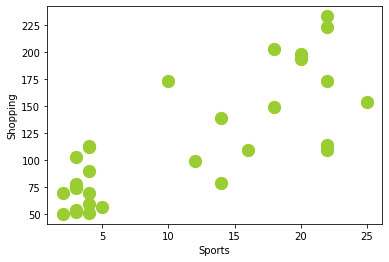

In [ ]:
dataset[dataset['Sports'] < 80].sample(30).plot.scatter(x='Sports', y='Shopping',s=150,c='yellowgreen')
plt.show()

HexPlot

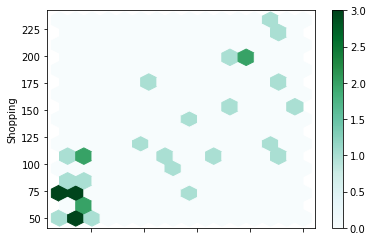

In [ ]:
dataset[dataset['Sports'] < 80].plot.hexbin(x='Sports', y='Shopping', gridsize=15)
plt.show()

## Line Plot

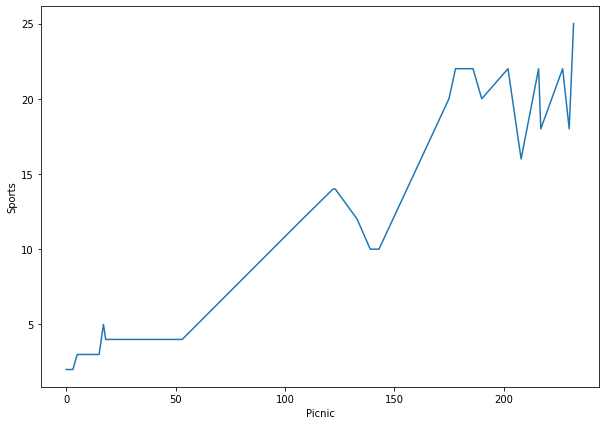

In [ ]:
plt.figure(figsize=(10,7))
x = dataset["Picnic"]
y = dataset["Sports"]
plt.plot(y)
plt.xlabel("Picnic")
plt.ylabel("Sports")
plt.show()

# Correlation 

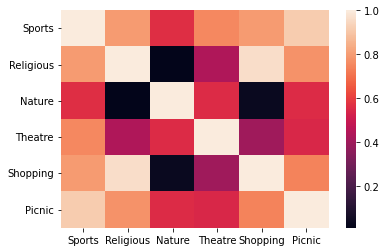

In [ ]:
correlation_matrix = dataset.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=False)